# Autoencoders for Anomaly Detection

## Introduction
Autoencoders are a type of neural network used to learn efficient representations of data, typically for dimensionality reduction or feature learning. They work by encoding the input into a lower-dimensional space and then reconstructing the output from this encoding. 

In this exercise, we will use an autoencoder to detect anomalies in images. The idea is to train the autoencoder to reconstruct normal images. When an anomalous image is input, the reconstruction error (difference between the input and output) will be higher compared to normal images.

### Objectives
- Understand the architecture of an autoencoder
- Implement an autoencoder using TensorFlow and Keras
- Use the autoencoder to detect anomalies in images


## Data Preparation
In this section, we will load and preprocess the dataset. We will use the MNIST dataset for this exercise. The MNIST dataset consists of handwritten digits, which we will use as normal data. To simulate anomalies, we will introduce random noise to some of the images.


In [11]:
# pip install tensorflow

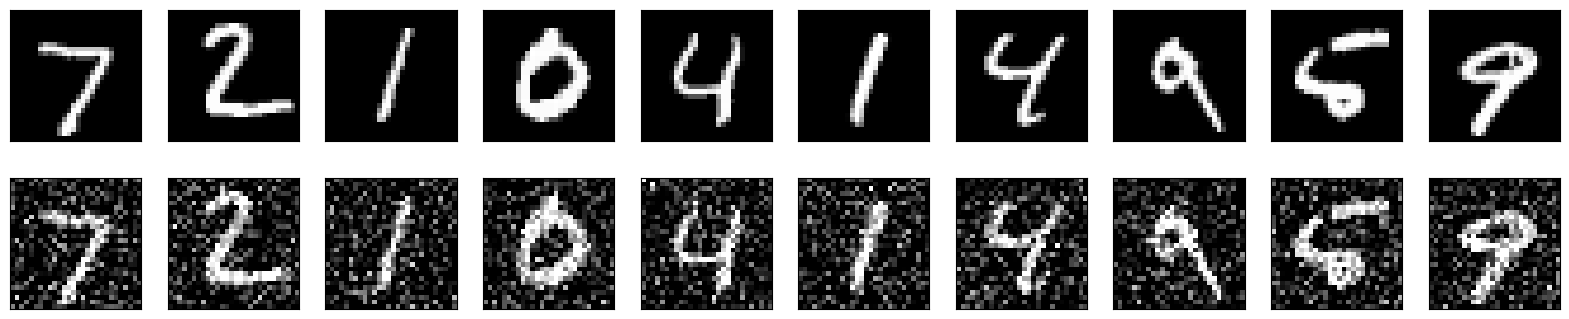

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to fit the model
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce random noise to the test set to create anomalies
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.3, size=x_test.shape)

# Clip the values to be between 0 and 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Plot some examples of normal and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display normal images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Building the Autoencoder
An autoencoder consists of an encoder and a decoder. The encoder compresses the input into a latent-space representation, and the decoder reconstructs the input from this representation.

In this section, we will build a simple autoencoder using Keras. The encoder will reduce the 28x28 input images to a lower-dimensional representation, and the decoder will reconstruct the images from this representation.


In [13]:
# Define the dimensions of the input image
input_dim = x_train.shape[1]
encoding_dim = 32 

input_img = Input(shape=(input_dim,))


# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)


# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)


# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Display the model architecture
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,852 (7.23 KB)

 Trainable params: 1,852 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Autoencoder
We will train the autoencoder using the normal images from the MNIST dataset. The goal is for the autoencoder to learn to reconstruct these normal images accurately.


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.4132 - val_loss: 0.1172
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.1085 - val_loss: 0.0965
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0939 - val_loss: 0.0903
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0885 - val_loss: 0.0865
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0850 - val_loss: 0.0837
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0825 - val_loss: 0.0819
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0809 - val_loss: 0.0806
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0798 - val_loss: 0.0797
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0787 - val_loss: 0.0790
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0782 - val_loss: 0.0781
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


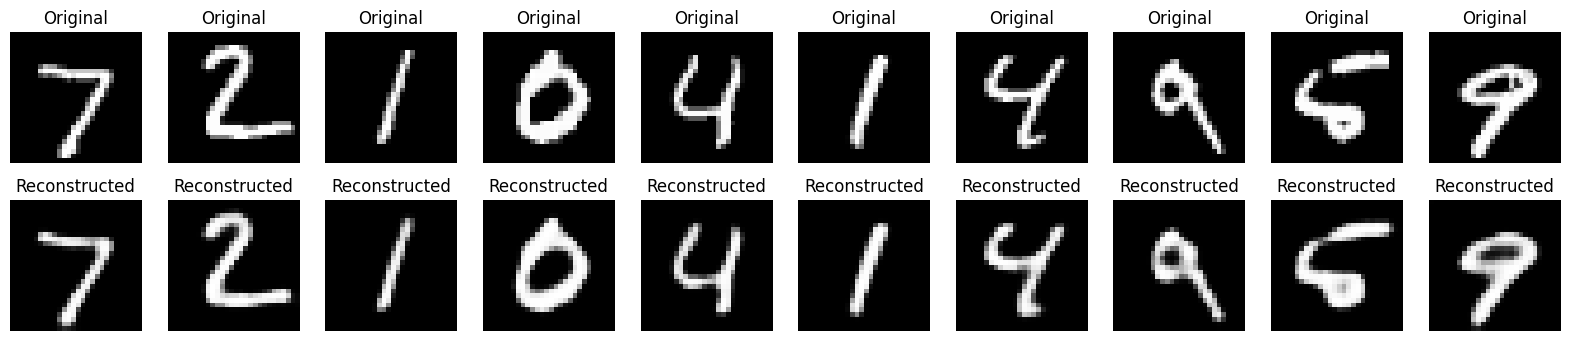

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the size of the input and the latent space
input_shape = (28, 28, 1)
encoding_dim = 32  # The size of the latent space representation

# Input placeholder
input_img = Input(shape=input_shape)

# Encoder: Convolutional layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder: Convolutional layers
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


## Evaluating the Autoencoder
Once the autoencoder is trained, we can evaluate its performance on the normal and noisy images. We expect the reconstruction error to be higher for the noisy (anomalous) images compared to the normal images.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MSE on normal test set: 0.005274001508951187
MSE on noisy test set: 0.046435657888650894


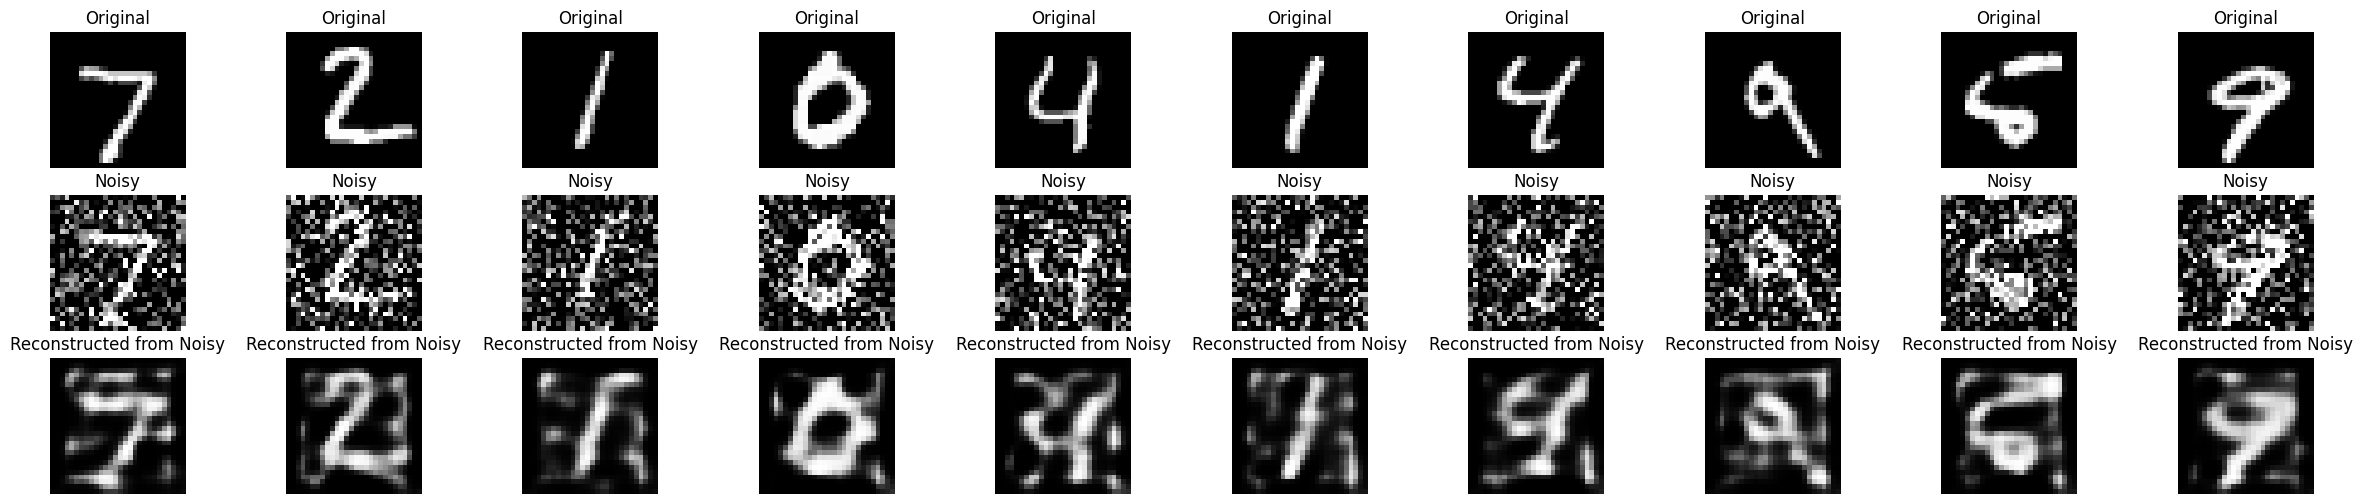

In [16]:
from sklearn.metrics import mean_squared_error

# Add noise to the test set
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Predict on the normal and noisy test sets
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

# Calculate the mean squared error between the original and reconstructed images
mse_normal = mean_squared_error(x_test.reshape(-1, 28*28), decoded_imgs.reshape(-1, 28*28))
mse_noisy = mean_squared_error(x_test.reshape(-1, 28*28), decoded_imgs_noisy.reshape(-1, 28*28))

print(f'MSE on normal test set: {mse_normal}')
print(f'MSE on noisy test set: {mse_noisy}')

# Plot original, noisy, and reconstructed images
n = 10  # How many digits we will display
plt.figure(figsize=(30, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display reconstruction from noisy
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed from Noisy")
    plt.axis('off')

plt.show()


# BONUS TRACK (pero chulo)
Repetir el experimento pero quitando una clase (el 7 o el 0 por ejemplo).
Entrenar el modelo sin esa clase y luego al predecir el text dejar las clases originales y la clase que falta para ver si esa clase la reconoceria como anomalia.

In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [18]:
# Load the MNIST dataset
# YOUR CODE HERE
(x_train, _), (x_test, _) = mnist.load_data()


In [19]:
# Normalize the data
# YOUR CODE HERE

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [20]:
# Reshape the data to fit the model
# YOUR CODE HERE
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [21]:
# Introduce random noise to the test set to create anomalies
# YOUR CODE HERE
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.3, size=x_test.shape)


In [22]:
# Clip the values to be between 0 and 1
# YOUR CODE HERE

x_test_noisy = np.clip(x_test_noisy, 0., 1.)


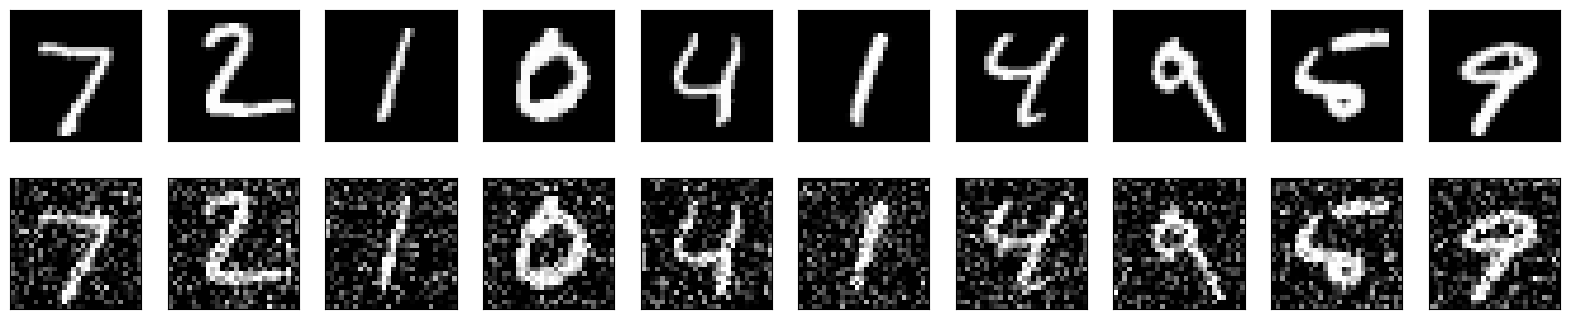

In [23]:
# Plot some examples of normal and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display normal images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
# Define the dimensions of the input image
input_img = Input(shape=(28, 28, 1))

In [25]:
# Encoder
# YOUR CODE HERE

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)


In [26]:
# Decoder
# YOUR CODE HERE

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [27]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [28]:
# Compile the model
# YOUR CODE HERE

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [29]:
# Display the model architecture
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,801 (14.85 KB)

 Trainable params: 3,801 (14.85 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the autoencoder
# YOUR CODE HERE

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.4456 - val_loss: 0.1174
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.1103 - val_loss: 0.0997
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0969 - val_loss: 0.0936
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0916 - val_loss: 0.0900
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0882 - val_loss: 0.0871
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0858 - val_loss: 0.0852
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0843 - val_loss: 0.0839
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0829 - val_loss: 0.0829
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0820 - val_loss: 0.0820
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0811 - val_loss: 0.0813


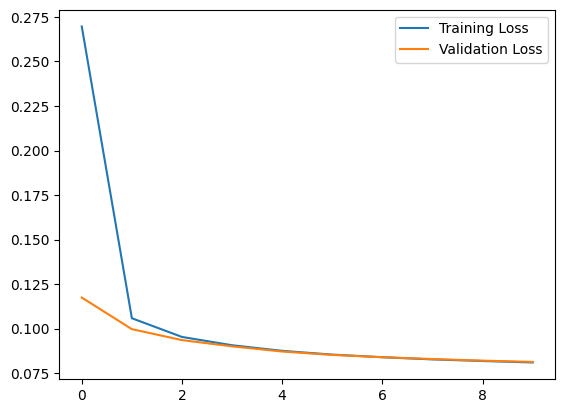

In [31]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [32]:
# Predict on the normal and noisy test sets
# YOUR CODE HERE


# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [33]:
# Calculate the mean squared error between the original and reconstructed images
# YOUR CODE HERE

def calculate_mse(original, reconstructed):
    original_flat = original.reshape(-1, 28*28)
    reconstructed_flat = reconstructed.reshape(-1, 28*28)
    return np.mean(np.power(original_flat - reconstructed_flat, 2), axis=1)

# Calcular el error cuadrático medio para cada conjunto
mse_normal = calculate_mse(x_test, decoded_imgs)
mse_noisy = calculate_mse(x_test_noisy, decoded_imgs_noisy)

print(f'MSE para imágenes normales: {np.mean(mse_normal)}')
print(f'MSE para imágenes ruidosas: {np.mean(mse_noisy)}')

MSE para imágenes normales: 0.006298904772847891
MSE para imágenes ruidosas: 0.06761766098574766


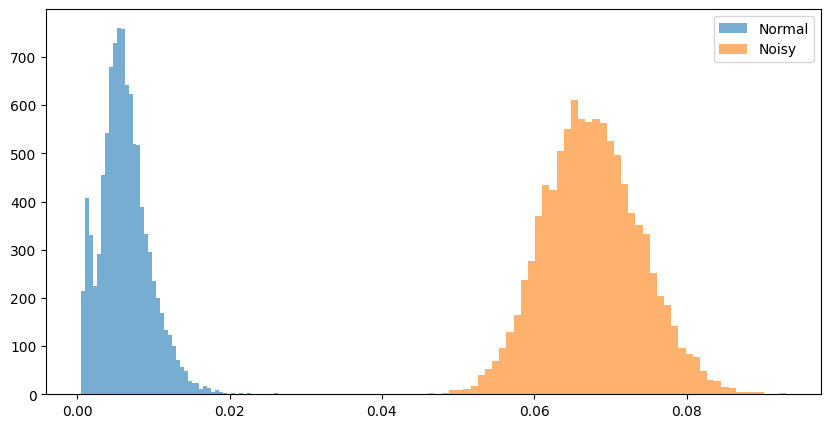

In [34]:
# Plot the MSE for normal and noisy images
plt.figure(figsize=(10, 5))
plt.hist(mse_normal, bins=50, alpha=0.6, label='Normal')
plt.hist(mse_noisy, bins=50, alpha=0.6, label='Noisy')
plt.legend()
plt.show()

In [36]:
# Define a threshold for anomaly detection
threshold = 0.02

In [38]:
# Detect anomalies
# YOUR CODE HERE

anomalies = mse_normal > threshold


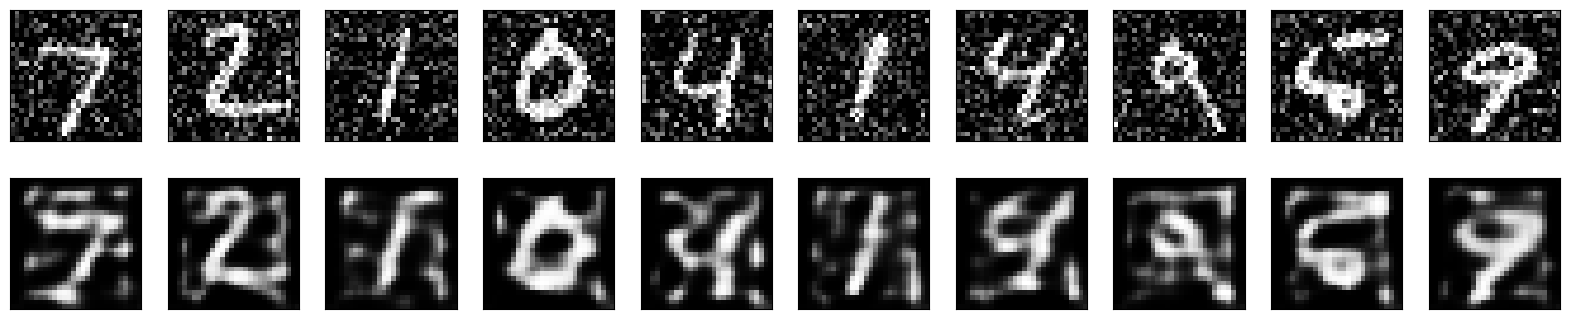

In [39]:

# Display some of the anomalies
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
